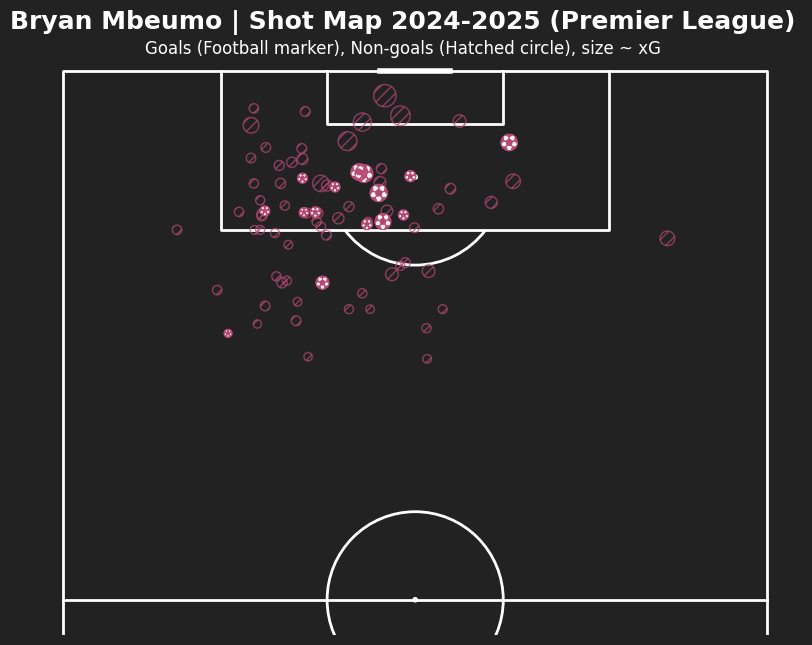

In [ ]:
import pandas as pd
import numpy as np
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# === 1. Load processed shots ===
csv_path = "../data/processed/understat/amad_diallo_shots_processed.csv"
df = pd.read_csv(csv_path)

# === 2. Pisahkan Goals & Non-goals ===
df_goals = df[df.outcome == 'Goal'].copy()
df_non_goals = df[df.outcome != 'Goal'].copy()

# === 3. Scale koordinat ke ukuran lapangan nyata ===
df['x'] = df['x'] * 120
df['y'] = df['y'] * 80
df_goals['x'] = df_goals['x'] * 120
df_goals['y'] = df_goals['y'] * 80
df_non_goals['x'] = df_non_goals['x'] * 120
df_non_goals['y'] = df_non_goals['y'] * 80

# === 4. Tambahkan jitter ke goals biar nggak ketumpuk ===
np.random.seed(42)  # biar hasil tetap
df_goals['x'] += np.random.uniform(-0.5, 0.5, size=len(df_goals))
df_goals['y'] += np.random.uniform(-0.5, 0.5, size=len(df_goals))

# === 5. Buat Pitch ===
pitch = VerticalPitch(half=True, pitch_color='#222222', line_color='white', pad_top=2)
fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)
fig.patch.set_facecolor('#222222')

# === 6. Plot Non-goals ===
pitch.scatter(
    df_non_goals.x, df_non_goals.y,
    s=(df_non_goals.xG * 350) + 30,
    edgecolors='#b94b75',
    c='None',
    hatch='///',
    marker='o',
    linewidths=1.0,
    alpha=0.7,
    ax=ax,
    zorder=2
)

# === 7. Plot Goals ===
pitch.scatter(
    df_goals.x, df_goals.y,
    s=(df_goals.xG * 350) + 30,
    edgecolors='#b94b75',
    linewidths=0.8,
    c='white',
    marker='football',
    alpha=0.95,
    ax=ax,
    zorder=3
)

# === Judul utama ===
title_text = f"{df['player'].iloc[0]} | Shot Map 2024-2025 (Premier League)"
fig.text(0.5, 0.83, title_text,
         ha='center', va='top',
         fontsize=18, color='white', weight='bold')

# === Subtitle ===
subtitle_text = f"Goals (Football marker), Non-goals (Hatched circle), size ~ xG"
fig.text(0.5, 0.8, subtitle_text,
         ha='center', va='top',
         fontsize=12, color='white')

plt.show()
